Importing Libraries

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

Loading the dataset

In [2]:
df=pd.read_csv("/content/drive/MyDrive/Datasets/heart_statlog_cleveland_hungary_final.csv")

In [3]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [7]:
#printing shape of the dataset
df.shape

(1190, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


Separating features and target

In [4]:
x=df.drop(columns='target', axis=1)     #considering all the columns except target column as features
y=df['target']                          #considering last column as target

Splitting training and testing sets

In [9]:
#20% of the data is splitted for testing and 80% for training
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=2)

In [10]:
#printing shapes of training and testing data
print(x.shape, X_train.shape, X_test.shape)

(1190, 11) (952, 11) (238, 11)


**Prediction models**

Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create and train the model
logistic_regression_model = LogisticRegression()
logistic_regression_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = logistic_regression_model.predict(X_test)

# Evaluate the model
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

Logistic Regression Accuracy: 0.7857142857142857


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Multiple linear regression

In [12]:
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score

# Convert DataFrames to NumPy arrays
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Flatten the sequences for linear regression
X_train_flatten = X_train_array.reshape(X_train_array.shape[0], -1)
X_test_flatten = X_test_array.reshape(X_test_array.shape[0], -1)

# Create and train the model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_flatten, y_train)

# Make predictions (round to 0 or 1)
y_pred_linear = np.round(linear_regression_model.predict(X_test_flatten))

# Convert to binary predictions
y_pred_linear[y_pred_linear < 0] = 0
y_pred_linear[y_pred_linear > 1] = 1

# Evaluate the model
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print("Multiple Linear Regression Accuracy:", accuracy_linear)

Multiple Linear Regression Accuracy: 0.8109243697478992


kNN classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Convert DataFrames to NumPy arrays
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Flatten the sequences
X_train_flatten = X_train_array.reshape(X_train_array.shape[0], -1)
X_test_flatten = X_test_array.reshape(X_test_array.shape[0], -1)

# Create and train the model
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_flatten, y_train)

# Make predictions
y_pred_knn = knn_model.predict(X_test_flatten)

# Evaluate the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Accuracy:", accuracy_knn)


KNN Accuracy: 0.7100840336134454


Random Forest Classifier

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Create and train the model
rf_model = RandomForestClassifier()
rf_model.fit(X_train_flatten, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test_flatten)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Accuracy: 0.9117647058823529


SVM (Support Vector Machine)


In [15]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Create and train the model
svm_model = SVC()
svm_model.fit(X_train_flatten, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test_flatten)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Accuracy:", accuracy_svm)


SVM Accuracy: 0.7058823529411765


Gradient Boosting

In [16]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Create and train the model
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_flatten, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test_flatten)

# Evaluate the model
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)


Gradient Boosting Accuracy: 0.8823529411764706


Decision Tree

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create and train the model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_flatten, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test_flatten)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)


Decision Tree Accuracy: 0.8571428571428571


Neural Networks

In [19]:
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

#standardize the data
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

#to get same accuracy score everytime we run
tf.random.set_seed(3)

#setting up the layers for neural network model
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(11,)),    #input layer (11 features)
                          keras.layers.Dense(20, activation='relu'),   #hidden layer
                          keras.layers.Dense(2, activation='sigmoid')   #output layer (2 neurons in output layer since we have 2 cat: 1,0)
])

#compiling the NN
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#traning the model
history = model.fit(X_train_std, y_train, validation_split=0.1, epochs=10)

#checking loss and accuracy of test data
loss,accuracy=model.evaluate(X_test_std, y_test)
print("Neural networks accuracy: ", accuracy)

Epoch 1/10
27/27 [==============================] - 1s 11ms/step - loss: 0.6972 - accuracy: 0.5397 - val_loss: 0.6270 - val_accuracy: 0.6562
Epoch 2/10
27/27 [==============================] - 0s 4ms/step - loss: 0.5814 - accuracy: 0.7033 - val_loss: 0.5298 - val_accuracy: 0.7812
Epoch 3/10
27/27 [==============================] - 0s 3ms/step - loss: 0.5070 - accuracy: 0.7815 - val_loss: 0.4659 - val_accuracy: 0.8333
Epoch 4/10
27/27 [==============================] - 0s 4ms/step - loss: 0.4578 - accuracy: 0.8119 - val_loss: 0.4233 - val_accuracy: 0.8542
Epoch 5/10
27/27 [==============================] - 0s 4ms/step - loss: 0.4250 - accuracy: 0.8213 - val_loss: 0.3981 - val_accuracy: 0.8438
Epoch 6/10
27/27 [==============================] - 0s 3ms/step - loss: 0.4039 - accuracy: 0.8248 - val_loss: 0.3796 - val_accuracy: 0.8646
Epoch 7/10
27/27 [==============================] - 0s 4ms/step - loss: 0.3895 - accuracy: 0.8411 - val_loss: 0.3672 - val_accuracy: 0.8333
Epoch 8/10
27/27 [=

**Comparison plot**

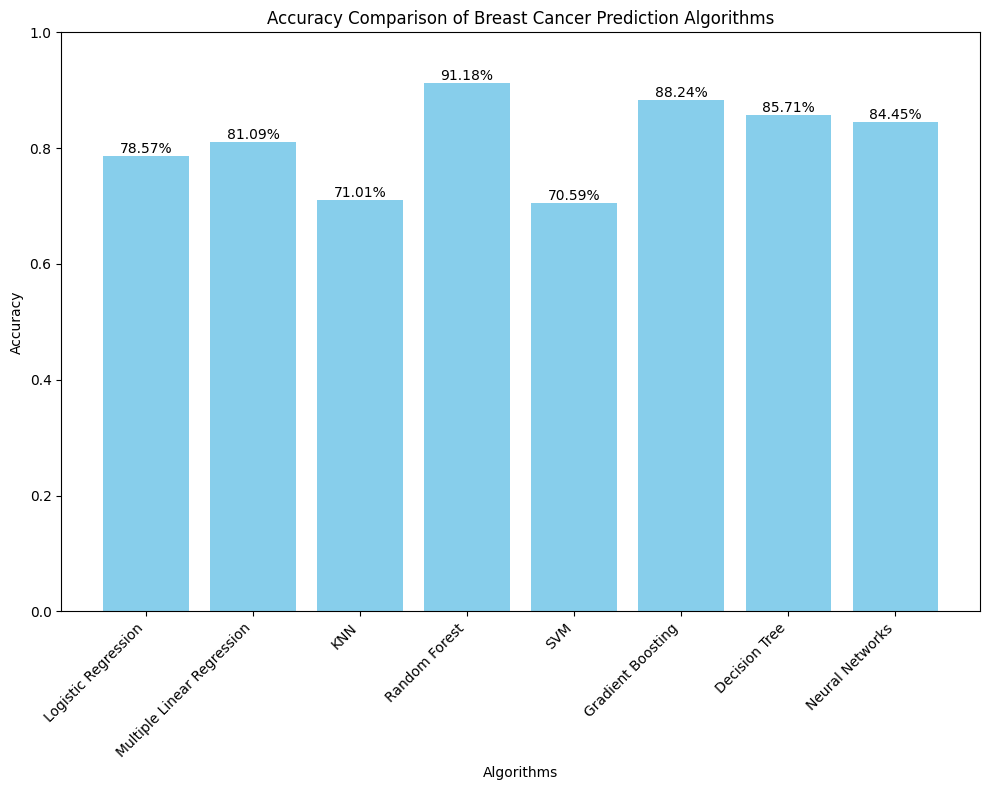

In [20]:
import matplotlib.pyplot as plt

# List of algorithms and their accuracies
algorithms = ['Logistic Regression', 'Multiple Linear Regression', 'KNN', 'Random Forest', 'SVM', 'Gradient Boosting', 'Decision Tree','Neural Networks']
accuracies = [accuracy_lr, accuracy_linear, accuracy_knn, accuracy_rf, accuracy_svm, accuracy_gb, accuracy_dt, accuracy]

# Plot the bar graph
plt.figure(figsize=(10, 8))
bars = plt.bar(algorithms, accuracies, color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Breast Cancer Prediction Algorithms')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)

# Add labels with percentages inside each bar
for bar, accuracy in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{accuracy:.2%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()


The plot indicates that the Random Forest classifier achieves a high accuracy of 91.18%, outperforming other models.

**Save random forest model and testing**

In [21]:
from joblib import dump

# Save the model
dump(rf_model, '/content/drive/MyDrive/Datasets/random_forest_model.joblib')

['/content/drive/MyDrive/Datasets/random_forest_model.joblib']

In [22]:
from joblib import load

#load the saved model
model = load('/content/drive/MyDrive/Datasets/random_forest_model.joblib')

In [23]:
import numpy as np

# Define static input features (example)
input = np.array([[49, 0, 3, 160, 180, 0, 0, 156, 0, 1, 2]])

# Make predictions using the loaded model
prediction = model.predict(input)

# Map the prediction to 0 or 1
prediction_label = "Heart disease present" if prediction == 1 else "No heart disease"

# Print the prediction
print("Prediction:", prediction_label)

Prediction: Heart disease present
